<a href="https://colab.research.google.com/github/primusr/mgrace/blob/main/System_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook Processess a single CSV of student feedbacks



Install Dependencies

In [ ]:
!pip install --upgrade numpy==1.24.4 scipy==1.13.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 897.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires n

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=ffaa001a6391faf94804d1da846ae30c4f50

import Libraries & Download NLTK Resources

In [ ]:
import pandas as pd
import re
import string
import io
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import time

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

text processing and sentiment

In [ ]:
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import opinion_lexicon
import stopwordsiso as custom_iso_stopwords
from textblob import TextBlob

Topic Modeling

In [ ]:
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from wordcloud import WordCloud

Generative AI

In [ ]:
import google.generativeai as genai
from google.colab import files, userdata

Google Translate

In [ ]:
from googletrans import Translator

NLTK Downloads

In [ ]:
print(" Downloading NLTK Resources ")
try:
    nltk.download('vader_lexicon', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('opinion_lexicon', quiet=True)
    print(" NLTK resources downloaded (or already up-to-date). ")
except Exception as e:
    print(f"An error occurred during NLTK downloads: {e}")

DetectorFactory.seed = 0

 NLTK resources downloaded (or already up-to-date). 


3. Configure Global Variables & API ---

In [ ]:
CONFIG = {
    "input_csv_path": "/content/2019 - 2nd Tri.csv",
    "filipino_lexicon_path": "/content/Fil_words_converted.csv", # Ensure this file is uploaded
    "output_sentiment_comparison_csv": "sentiment_analysis_results_comparison.csv",
    "output_all_gemini_recs_csv": "all_gemini_recommendations.csv",
    "default_feedback_column_names": ['feedback', 'comments', 'Comment', 'Strengths'],
    "lda_stopwords": ['mam', 'maam', 'sir', 'po', 'lang', 'naman', 'wala', 'nya', 'sana', 'mag', 'kasi', 'wag', 'tsaka', 'di', 'pang', 'pag', 'thank', 'thankyou', 'none', 'nothing', 'po', 'ako', 'naman', 'naman po','kayo'],
    "find_optimal_lda_topics": True,  # Set to False to skip optimal topic search for speed
    "lda_topic_range_start": 3,
    "lda_topic_range_end": 10, # Keep this moderate for reasonable runtime
    "lda_topic_range_step": 1,
    "lda_default_num_topics": 6,
    "lda_passes": 25,
    "lda_random_state": 42,
    "gemini_model_name": 'models/gemini-2.0-flash-lite',
    "top_n_words_for_topic_labeling": 10,
    "top_n_words_for_topic_gemini_summary": 7,
    "num_topics_for_overall_gemini_summary": 3,
    "num_ai_recs_per_topic_subset": 3, # How many topics to get detailed AI recs for
    "api_call_delay": 1.5 # Increased default delay for Gemini
}

4. Initialize Global Variables & API

In [ ]:
iso_stopwords = custom_iso_stopwords.stopwords(["en", "tl"])
nltk_en_stopwords = set(nltk_stopwords.words('english'))
preprocessing_stopwords = set(iso_stopwords).union(nltk_en_stopwords)
combined_stopwords = set(CONFIG["lda_stopwords"]).union(iso_stopwords).union(nltk_en_stopwords)
lemmatizer = WordNetLemmatizer()
translator = Translator()
vader_analyzer_english = SentimentIntensityAnalyzer()
vader_analyzer_augmented = SentimentIntensityAnalyzer()

def load_filipino_vader_lexicon(csv_path):
    try:
        if not os.path.exists(csv_path):
            print(f"Warning: Lexicon file '{csv_path}' not found in /content/. Attempting to upload...")
            uploaded_lex_files = files.upload()
            if os.path.basename(csv_path) not in uploaded_lex_files:
                print(f"Error: '{os.path.basename(csv_path)}' not uploaded. Cannot augment VADER lexicon.")
                return {}
            lex_df = pd.read_csv(io.BytesIO(uploaded_lex_files[os.path.basename(csv_path)]))
            print(f"Successfully read uploaded '{os.path.basename(csv_path)}'.")
        else:
            lex_df = pd.read_csv(csv_path)
        if 'Word' not in lex_df.columns or 'Sentiment_Score' not in lex_df.columns:
            print(f"Warning: Lexicon CSV '{csv_path}' must contain 'Word' and 'Sentiment_Score' columns.")
            return {}
        filipino_lexicon = {
            str(row['Word']).lower(): float(row['Sentiment_Score'])
            for index, row in lex_df.iterrows() if pd.notnull(row['Word']) and pd.notnull(row['Sentiment_Score'])
        }
        print(f"Loaded {len(filipino_lexicon)} Filipino words from '{csv_path}' for VADER lexicon.")
        return filipino_lexicon
    except Exception as e:
        print(f"Error loading Filipino lexicon from '{csv_path}': {e}")
        return {}

filipino_vader_words = load_filipino_vader_lexicon(CONFIG["filipino_lexicon_path"])
if filipino_vader_words:
    vader_analyzer_augmented.lexicon.update(filipino_vader_words)
    print("vader_analyzer_augmented lexicon successfully augmented.")
else:
    print("vader_analyzer_augmented lexicon not augmented.")

gemini_model = None
try:
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    if not GOOGLE_API_KEY: raise ValueError("GOOGLE_API_KEY not in Colab secrets.")
    genai.configure(api_key=GOOGLE_API_KEY); print("Gemini API key configured.")
    gemini_model = genai.GenerativeModel(CONFIG["gemini_model_name"]); print(f"Gemini model '{CONFIG['gemini_model_name']}' initialized.")
except Exception as e: print(f"Gemini API/model error: {e}"); gemini_model = None

def make_gemini_request_with_retry(prompt_text, max_retries=3):
    if not gemini_model: return "Gemini model not configured."
    delay = CONFIG["api_call_delay"]
    for attempt in range(max_retries):
        try:
            response = gemini_model.generate_content(prompt_text)
            return response.text.strip()
        except genai.types.generation_types.StopCandidateException as e:
            print(f"Gemini API: Content generation stopped (Attempt {attempt + 1}/{max_retries}): {e}")
            return f"Content generation stopped due to safety settings: {e}"
        except Exception as e:
            if "429" in str(e) or "Resource has been exhausted" in str(e) or "rate limit" in str(e).lower():
                print(f"Gemini API: Rate limit (Attempt {attempt + 1}/{max_retries}). Retrying in {delay}s...")
                time.sleep(delay); delay *= 2
            else:
                print(f"Gemini API call failed (Attempt {attempt + 1}/{max_retries}): {e}")
                if attempt == max_retries - 1: return f"Error after {max_retries} attempts: {e}"
                time.sleep(delay); delay *=2
    return f"Failed to get response from Gemini after {max_retries} retries."

all_gemini_recommendations_data = []

Loaded 1536 Filipino words from '/content/Fil_words_converted.csv' for VADER lexicon.
vader_analyzer_augmented lexicon successfully augmented.
Gemini API key configured.
Gemini model 'models/gemini-2.0-flash-lite' initialized.


5. Preprocessing Functions

In [ ]:
def preprocess_text(text, for_lda=False):
    if not isinstance(text, str): return ""
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'#\w+', '', text); text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    current_stopwords_list = combined_stopwords if for_lda else preprocessing_stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in current_stopwords_list and len(token) > 1]
    return ' '.join(list(set(tokens)))

def clean_dataframe(df, preferred_text_column_names):
    original_text_column = None
    for col_name in preferred_text_column_names:
        if col_name in df.columns:
            original_text_column = col_name
            print(f"Using specified feedback column: '{original_text_column}'")
            break
    if not original_text_column:
        if df.shape[1] > 0 and (df.columns[0] == 0 or isinstance(df.columns[0], int)):
            original_text_column = df.columns[0]
            print(f"Warning: Preferred cols not found. Using first col ('{str(original_text_column)}').")
        elif any(df[col].dtype == 'object' for col in df.columns):
            potential_cols = [col for col in df.columns if df[col].dtype == 'object']
            original_text_column = max(potential_cols, key=lambda col: df[col].astype(str).str.len().mean(), default=None)
            if original_text_column: print(f"Warning: Preferred cols not found. Guessed: '{original_text_column}'")
    if not original_text_column and df.shape[1] > 0:
        original_text_column = df.columns[0]
        print(f"Warning: Still couldn't find good col. Using first: '{str(original_text_column)}'")
    elif not original_text_column: raise ValueError("DataFrame empty or no suitable text column.")
    df['Original_Text'] = df[original_text_column].copy()
    df = df[df[original_text_column].notnull() & (df[original_text_column].astype(str) != '0')]
    df.rename(columns={str(original_text_column): 'Feedback_Text'}, inplace=True)
    return df[['Original_Text', 'Feedback_Text']]

6. Sentiment Analysis Functions


In [ ]:
def get_vader_sentiment_english(text_for_vader_eng):
    try:
        if not isinstance(text_for_vader_eng, str): text_for_vader_eng = ""
        lang = detect(text_for_vader_eng) if text_for_vader_eng.strip() else 'en'
        if lang != 'en':
            if len(text_for_vader_eng.split()) > 2:
                 time.sleep(CONFIG["api_call_delay"])
                 text_en = translator.translate(text_for_vader_eng, dest='en').text
            else: text_en = text_for_vader_eng
        else: text_en = text_for_vader_eng
    except Exception: text_en = text_for_vader_eng
    compound_score = vader_analyzer_english.polarity_scores(text_en)['compound']
    if compound_score >= 0.05: sentiment_label = "Positive (VADER Eng)"
    elif compound_score <= -0.05: sentiment_label = "Negative (VADER Eng)"
    else: sentiment_label = "Neutral (VADER Eng)"
    return compound_score, sentiment_label

def get_vader_sentiment_augmented(cleaned_text_for_vader_aug):
    if not isinstance(cleaned_text_for_vader_aug, str): cleaned_text_for_vader_aug = ""
    text_to_analyze = cleaned_text_for_vader_aug.lower()
    compound_score = vader_analyzer_augmented.polarity_scores(text_to_analyze)['compound']
    if compound_score >= 0.05: sentiment_label = "Positive (VADER Aug)"
    elif compound_score <= -0.05: sentiment_label = "Negative (VADER Aug)"
    else: sentiment_label = "Neutral (VADER Aug)"
    return compound_score, sentiment_label

filipino_positive_keywords = ['magaling', 'mahusay', 'matalino', 'mabait', 'matulungin', 'okay', 'malinaw', 'masaya', 'galing', 'husay', 'saya', 'maayos', 'excellent', 'creative', 'practical', 'professional', 'humble', 'understanding', 'motivating', 'caring', 'cool', 'responsible', 'proficient', 'warm-hearted', 'systematically', 'efficient', 'up to date', 'kind', 'fair', 'considerate', 'beautiful', 'interesting', 'funny', 'awesome', 'best', 'open', 'competent', 'helpful', 'nice', 'approachable']
filipino_negative_keywords = ['hindi', 'di', 'pangit', 'masama', 'mahirap', 'hindi marunong', 'malabo', 'nakakabagot', 'hindi malinaw', 'magulo', 'ayaw', 'fast paced', 'ineffective', 'too much', 'noisy', 'threatening', 'favoritism', 'boring']
def get_filipino_keyword_sentiment(cleaned_text):
    if not isinstance(cleaned_text, str): cleaned_text = ""
    score = 0; positive_matches = []; negative_matches = []
    tokens = cleaned_text.lower().split()
    for word in filipino_positive_keywords:
        if word in tokens: score += 1; positive_matches.append(word)
    for word in filipino_negative_keywords:
        if word in tokens: score -= 1; negative_matches.append(word)
    if score > 0: sentiment_label = "Positive (Filipino Keywords)"
    elif score < 0: sentiment_label = "Negative (Filipino Keywords)"
    else: sentiment_label = "Neutral (Filipino Keywords)"
    return score, sentiment_label, ", ".join(list(set(positive_matches))), ", ".join(list(set(negative_matches)))
def get_textblob_polarity_subjectivity(text_for_tb):
    """
    Calculates TextBlob polarity and subjectivity.
    Attempts translation to English for better consistency.
    """
    try:
        if not isinstance(text_for_tb, str): text_for_tb = ""
        lang = detect(text_for_tb) if text_for_tb.strip() else 'en'
        if lang != 'en':
            if len(text_for_tb.split()) > 2:
                 time.sleep(CONFIG["api_call_delay"])
                 text_en = translator.translate(text_for_tb, dest='en').text
            else:
                 text_en = text_for_tb
        else:
            text_en = text_for_tb
    except Exception:
        text_en = text_for_tb # Fallback

    blob = TextBlob(text_en)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

7. Data Loading and Processing Workflow

In [ ]:
print("Starting Data Loading and Sentiment Calculation")
csv_file_path = CONFIG["input_csv_path"]
print(f"\nProcessing file: {csv_file_path}")

cleaned_df = pd.DataFrame()
lda_model = None
actual_num_topics_for_lda = CONFIG["lda_default_num_topics"] # Initialize

if not os.path.exists(csv_file_path):
    print(f"Error: The file '{csv_file_path}' was not found.")
else:
    try:
        encodings_to_try = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252', 'unicode_escape']
        df_raw = None
        for enc in encodings_to_try:
            try:
                df_raw = pd.read_csv(csv_file_path, header=0, encoding=enc)
                print(f"Successfully read CSV with encoding: {enc}")
                break
            except UnicodeDecodeError: print(f"Failed to decode with {enc}, trying next...")
            except Exception as e_read: print(f"Error reading with encoding {enc}: {e_read}")
        if df_raw is None: raise ValueError("Could not read CSV.")

        cleaned_df = clean_dataframe(df_raw.copy(), CONFIG["default_feedback_column_names"])
        cleaned_df['Cleaned_Text_Main'] = cleaned_df['Feedback_Text'].apply(lambda x: preprocess_text(x, for_lda=True))
        cleaned_df = cleaned_df[cleaned_df['Cleaned_Text_Main'] != '']
        cleaned_df.dropna(subset=['Cleaned_Text_Main'], inplace=True)

        if cleaned_df.empty:
            print("DataFrame is empty after cleaning. Cannot proceed.")
        else:
            print("\nApplying Standard VADER Sentiment Analysis...")
            cleaned_df[['VADER_Score_Eng', 'VADER_Sentiment_Eng']] = cleaned_df['Feedback_Text'].apply(lambda x: pd.Series(get_vader_sentiment_english(x)))

            print("\nApplying Augmented VADER Sentiment Analysis...")
            cleaned_df[['VADER_Score_Aug', 'VADER_Sentiment_Aug']] = cleaned_df['Cleaned_Text_Main'].apply(lambda x: pd.Series(get_vader_sentiment_augmented(x)))

            print("\nApplying Filipino Keyword Sentiment Analysis...")
            cleaned_df[['Filipino_Keyword_Score', 'Filipino_Keyword_Sentiment',
                        'Filipino_Positive_Keywords_Found', 'Filipino_Negative_Keywords_Found']] = cleaned_df['Cleaned_Text_Main'].apply(lambda x: pd.Series(get_filipino_keyword_sentiment(x)))

            print("\nApplying TextBlob Polarity/Subjectivity Analysis...")
            cleaned_df[['TextBlob_Polarity', 'TextBlob_Subjectivity']] = cleaned_df['Feedback_Text'].apply(
                lambda x: pd.Series(get_textblob_polarity_subjectivity(x))
            )
            print("\nProcessed DataFrame with Sentiment Scores (Sample)")
            pd.set_option('display.max_colwidth', 50); pd.set_option('display.max_columns', None); pd.set_option('display.width', 1000)
            print("\nFirst 5 rows:")
            display(cleaned_df.head(5))
            print("\nLast 5 rows:")
            display(cleaned_df.tail(5))
            # pd.reset_option('all') # Or reset individual options if preferred
            print("-" * 70)

            comparison_filename = CONFIG["output_sentiment_comparison_csv"]
            cleaned_df.to_csv(comparison_filename, index=False)
            print(f"\nFull sentiment analysis results saved to '{comparison_filename}'.")
            files.download(comparison_filename)
            print(f"Download prompted for '{comparison_filename}'.")
    except Exception as e:
        print(f"An unexpected error in Section 7.0: {e}")
        import traceback
        traceback.print_exc()

Starting Data Loading and Sentiment Calculation

Processing file: /content/2019 - 2nd Tri.csv
Successfully read CSV with encoding: utf-8
Using specified feedback column: 'feedback'

Applying Standard VADER Sentiment Analysis...


<ipython-input-56-33a3a4f866b5>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Cleaned_Text_Main'], inplace=True)



Applying Augmented VADER Sentiment Analysis...

Applying Filipino Keyword Sentiment Analysis...

Applying TextBlob Polarity/Subjectivity Analysis...

Processed DataFrame with Sentiment Scores (Sample)

First 5 rows:


,Original_Text,Feedback_Text,Cleaned_Text_Main,VADER_Score_Eng,VADER_Sentiment_Eng,VADER_Score_Aug,VADER_Sentiment_Aug,Filipino_Keyword_Score,Filipino_Keyword_Sentiment,Filipino_Positive_Keywords_Found,Filipino_Negative_Keywords_Found,TextBlob_Polarity,TextBlob_Subjectivity
0,Very professional and humble. He is very under...,Very professional and humble. He is very under...,professional motivating understanding humble,0.5367,Positive (VADER Eng),0.4939,Positive (VADER Aug),4,Positive (Filipino Keywords),"professional, motivating, understanding, humble",,0.043333,0.276667
1,He's considerate.,He's considerate.,considerate,0.4404,Positive (VADER Eng),0.4404,Positive (VADER Aug),1,Positive (Filipino Keywords),considerate,,0.000000,0.000000
2,To add more creative and practical law applica...,To add more creative and practical law applica...,practical application law creative add,0.4927,Positive (VADER Eng),0.4404,Positive (VADER Aug),2,Positive (Filipino Keywords),"practical, creative",,0.500000,0.750000
5,"calm,approachable","calm,approachable",calmapproachable,0.0000,Neutral (VADER Eng),0.0000,Neutral (VADER Aug),0,Neutral (Filipino Keywords),,,0.000000,0.000000
6,sometimes very fast in speaking during lecture -,sometimes very fast in speaking during lecture -,speaking fast lecture,0.0000,Neutral (VADER Eng),0.0000,Neutral (VADER Aug),0,Neutral (Filipino Keywords),,,0.260000,0.780000



Last 5 rows:


,Original_Text,Feedback_Text,Cleaned_Text_Main,VADER_Score_Eng,VADER_Sentiment_Eng,VADER_Score_Aug,VADER_Sentiment_Aug,Filipino_Keyword_Score,Filipino_Keyword_Sentiment,Filipino_Positive_Keywords_Found,Filipino_Negative_Keywords_Found,TextBlob_Polarity,TextBlob_Subjectivity
175,she is very helpful and very nice -she always ...,she is very helpful and very nice -she always ...,laugh lesson nice fun energy morning helpful,0.9380,Positive (VADER Eng),0.9274,Positive (VADER Aug),2,Positive (Filipino Keywords),"nice, helpful",,0.416000,0.42000
179,MAAYOS LAGI ANG PANANAMIT AT LAGING HANDA SA P...,MAAYOS LAGI ANG PANANAMIT AT LAGING HANDA SA P...,pananamit score nagbibigay masaya laging pati ...,-0.2325,Negative (VADER Eng),0.9781,Positive (VADER Aug),2,Positive (Filipino Keywords),"maayos, masaya",,0.343704,0.63037
180,WALA PO SIR <3 INGAT KAYO PALAGI <3,WALA PO SIR <3 INGAT KAYO PALAGI <3,palagi ingat,0.1197,Positive (VADER Eng),0.7184,Positive (VADER Aug),0,Neutral (Filipino Keywords),,,1.000000,1.00000
181,Mastery over his subjects,Mastery over his subjects,subject mastery,0.0000,Neutral (VADER Eng),0.0000,Neutral (VADER Aug),0,Neutral (Filipino Keywords),,,0.000000,0.00000
182,excellent professor,excellent professor,excellent professor,0.5719,Positive (VADER Eng),0.5719,Positive (VADER Aug),1,Positive (Filipino Keywords),excellent,,1.000000,1.00000


----------------------------------------------------------------------

Full sentiment analysis results saved to 'sentiment_analysis_results_comparison.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download prompted for 'sentiment_analysis_results_comparison.csv'.


7.1 Overall System Sentiment Score

In [ ]:
print("\nOverall System Sentiment Scores & Distributions")
if not cleaned_df.empty:
    if 'VADER_Score_Eng' in cleaned_df.columns and 'VADER_Sentiment_Eng' in cleaned_df.columns:
        print("\nStandard VADER (English/Translated)")
        avg_score_eng = cleaned_df['VADER_Score_Eng'].mean()
        print(f"Methodology: Avg of Std VADER scores (on Feedback_Text). Score: {avg_score_eng:.4f}")
        interp_eng = "Neutral"
        if avg_score_eng >= 0.05: interp_eng = "Generally Positive"
        elif avg_score_eng <= -0.05: interp_eng = "Generally Negative"
        print(f"Interpretation: Overall sentiment (Eng VADER) is {interp_eng.lower()}.")
        counts_eng = cleaned_df['VADER_Sentiment_Eng'].value_counts()
        if not counts_eng.empty:
            total_eng = counts_eng.sum()
            print(f"Dominant Category: {counts_eng.idxmax()} ({counts_eng.max()}/{total_eng} comments)")
            print("Distribution (Std VADER):")
            for s, c in counts_eng.items(): print(f"  - {s}: {c} comments ({(c/total_eng)*100:.2f}%)")
        else: print("  No data for Std VADER distribution.")
    else: print("\nStd VADER (Eng) columns not found.")
    print("-" * 30)
    if 'VADER_Score_Aug' in cleaned_df.columns and 'VADER_Sentiment_Aug' in cleaned_df.columns:
        print("\nAugmented VADER (with Filipino Lexicon)")
        avg_score_aug = cleaned_df['VADER_Score_Aug'].mean()
        print(f"Methodology: Avg of Aug VADER scores (on Cleaned_Text_Main). Score: {avg_score_aug:.4f}")
        interp_aug = "Neutral"
        if avg_score_aug >= 0.05: interp_aug = "Generally Positive"
        elif avg_score_aug <= -0.05: interp_aug = "Generally Negative"
        print(f"Interpretation: Overall sentiment (Aug VADER) is {interp_aug.lower()}.")
        counts_aug = cleaned_df['VADER_Sentiment_Aug'].value_counts()
        if not counts_aug.empty:
            total_aug = counts_aug.sum()
            print(f"Dominant Category: {counts_aug.idxmax()} ({counts_aug.max()}/{total_aug} comments)")
            print("Distribution (Aug VADER):")
            for s, c in counts_aug.items(): print(f"  - {s}: {c} comments ({(c/total_aug)*100:.2f}%)")
        else: print("  No data for Aug VADER distribution.")
    else: print("\nAug VADER columns not found.")
    if 'Filipino_Keyword_Sentiment' in cleaned_df.columns:
        print("-" * 30); print("\n-- Filipino Keyword Sentiment (Direct Count) --")
        counts_fil = cleaned_df['Filipino_Keyword_Sentiment'].value_counts()
        if not counts_fil.empty:
            total_fil = counts_fil.sum()
            print(f"Dominant Category: {counts_fil.idxmax()} ({counts_fil.max()}/{total_fil} comments)")
            print("Distribution (Filipino Keywords):")
            for s, c in counts_fil.items(): print(f"  - {s}: {c} comments ({(c/total_fil)*100:.2f}%)")
        else: print("  No data for Filipino Keyword distribution.")
else: print("\nCannot calculate overall scores. DataFrame empty.")


Overall System Sentiment Scores & Distributions

Standard VADER (English/Translated)
Methodology: Avg of Std VADER scores (on Feedback_Text). Score: 0.3608
Interpretation: Overall sentiment (Eng VADER) is generally positive.
Dominant Category: Positive (VADER Eng) (86/134 comments)
Distribution (Std VADER):
  - Positive (VADER Eng): 86 comments (64.18%)
  - Neutral (VADER Eng): 37 comments (27.61%)
  - Negative (VADER Eng): 11 comments (8.21%)
------------------------------

Augmented VADER (with Filipino Lexicon)
Methodology: Avg of Aug VADER scores (on Cleaned_Text_Main). Score: 0.2955
Interpretation: Overall sentiment (Aug VADER) is generally positive.
Dominant Category: Positive (VADER Aug) (73/134 comments)
Distribution (Aug VADER):
  - Positive (VADER Aug): 73 comments (54.48%)
  - Neutral (VADER Aug): 54 comments (40.30%)
  - Negative (VADER Aug): 7 comments (5.22%)
------------------------------

-- Filipino Keyword Sentiment (Direct Count) --
Dominant Category: Neutral (Filip

7.2 Find Optimal Number of LDA Topics


Finding Optimal Number of LDA Topics
Evaluating LDA for 3 to 10 topics (step 1)...
  Coherence for 3 topics: C_v=0.5752, UMass=-18.8690, C_NPMI=-0.4757
  Coherence for 4 topics: C_v=0.5630, UMass=-18.7905, C_NPMI=-0.4602
  Coherence for 5 topics: C_v=0.5531, UMass=-18.3181, C_NPMI=-0.4415
  Coherence for 6 topics: C_v=0.5517, UMass=-18.1593, C_NPMI=-0.4355
  Coherence for 7 topics: C_v=0.5456, UMass=-18.0639, C_NPMI=-0.4367
  Coherence for 8 topics: C_v=0.5615, UMass=-18.5012, C_NPMI=-0.4529
  Coherence for 9 topics: C_v=0.5349, UMass=-17.6577, C_NPMI=-0.4222
  Coherence for 10 topics: C_v=0.5499, UMass=-17.7866, C_NPMI=-0.4331


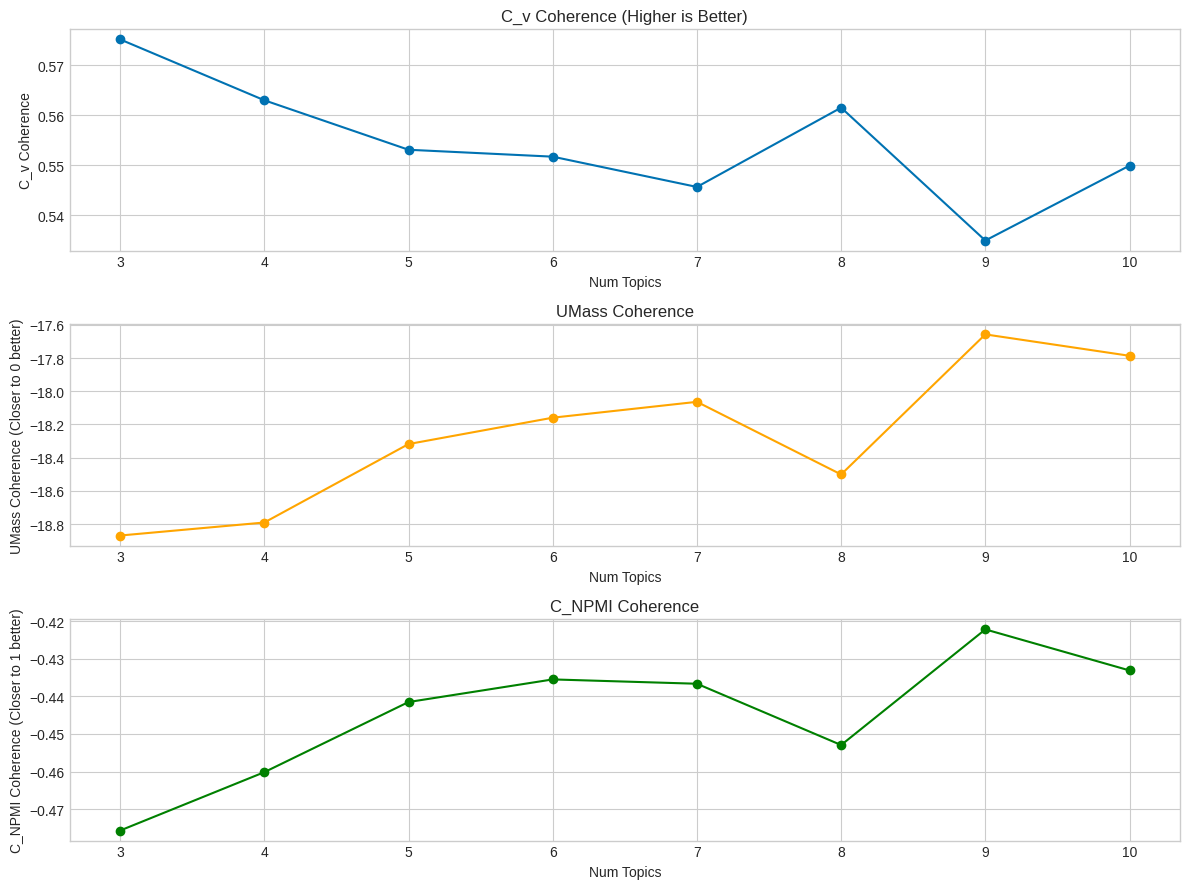


Optimal topics (C_v): 3


In [ ]:
print("\nFinding Optimal Number of LDA Topics")
optimal_num_topics = CONFIG["lda_default_num_topics"]
actual_num_topics_for_lda = optimal_num_topics
if CONFIG.get("find_optimal_lda_topics", True):
    if not cleaned_df.empty and 'Cleaned_Text_Main' in cleaned_df:
        texts_for_lda_optimal = cleaned_df['Cleaned_Text_Main'].tolist()
        tokenized_texts_optimal = [text.split() for text in texts_for_lda_optimal if text]
        if not tokenized_texts_optimal or all(not t for t in tokenized_texts_optimal):
            print("No valid text data for optimal topics. Using default.")
        else:
            dictionary_optimal = corpora.Dictionary(tokenized_texts_optimal)
            dictionary_optimal.filter_extremes(no_below=2, no_above=0.9)
            corpus_optimal = [dictionary_optimal.doc2bow(text) for text in tokenized_texts_optimal]
            corpus_optimal = [c for c in corpus_optimal if c]
            if not corpus_optimal or not dictionary_optimal or len(dictionary_optimal.keys()) == 0:
                print("Corpus/dictionary empty for optimal search. Using default.")
            else:
                coherence_values_cv, coherence_values_umass, coherence_values_cnpmi, model_list = [], [], [], []
                topic_range_start = CONFIG["lda_topic_range_start"]
                max_possible_topics = len(dictionary_optimal.keys())
                topic_range_end = min(CONFIG["lda_topic_range_end"], max_possible_topics if max_possible_topics > 0 else topic_range_start)
                if topic_range_start > topic_range_end:
                    topic_range_end = topic_range_start
                    if topic_range_start > 1: print(f"Warning: Dict too small. Testing only {topic_range_start} topics.")
                    else: print("Warning: Dict too small. Skipping optimal search."); topic_range_start = 0
                topic_step = CONFIG["lda_topic_range_step"]
                if topic_range_start >= 1 and topic_range_start <= topic_range_end:
                    print(f"Evaluating LDA for {topic_range_start} to {topic_range_end} topics (step {topic_step})...")
                    for num_topics_iter in range(topic_range_start, topic_range_end + 1, topic_step):
                        if num_topics_iter == 0 : continue
                        try:
                            model = LdaModel(corpus=corpus_optimal, id2word=dictionary_optimal, num_topics=num_topics_iter, random_state=CONFIG["lda_random_state"], passes=CONFIG["lda_passes"], alpha='auto', eta='auto')
                            model_list.append(model)
                            coherencemodel_cv = CoherenceModel(model=model, texts=tokenized_texts_optimal, dictionary=dictionary_optimal, coherence='c_v'); cv_score = coherencemodel_cv.get_coherence(); coherence_values_cv.append(cv_score)
                            coherencemodel_umass = CoherenceModel(model=model, dictionary=dictionary_optimal, corpus=corpus_optimal, coherence='u_mass'); umass_score = coherencemodel_umass.get_coherence(); coherence_values_umass.append(umass_score)
                            coherencemodel_cnpmi = CoherenceModel(model=model, texts=tokenized_texts_optimal, dictionary=dictionary_optimal, coherence='c_npmi'); cnpmi_score = coherencemodel_cnpmi.get_coherence(); coherence_values_cnpmi.append(cnpmi_score)
                            print(f"  Coherence for {num_topics_iter} topics: C_v={cv_score:.4f}, UMass={umass_score:.4f}, C_NPMI={cnpmi_score:.4f}")
                        except Exception as e_lda_optim: print(f"Error LDA for {num_topics_iter} topics: {e_lda_optim}. Skipping."); coherence_values_cv.append(None); coherence_values_umass.append(None); coherence_values_cnpmi.append(None); model_list.append(None)
                    if any(cv is not None for cv in coherence_values_cv):
                        x_values_range = list(range(topic_range_start, topic_range_end + 1, topic_step))
                        valid_indices = [i for i, m in enumerate(model_list) if m is not None]
                        valid_x = [x_values_range[i] for i in valid_indices]
                        valid_cv = [coherence_values_cv[i] for i in valid_indices if coherence_values_cv[i] is not None]
                        valid_umass = [coherence_values_umass[i] for i in valid_indices if coherence_values_umass[i] is not None]
                        valid_cnpmi = [coherence_values_cnpmi[i] for i in valid_indices if coherence_values_cnpmi[i] is not None]
                        if valid_x:
                            plt.figure(figsize=(12, 9))
                            if valid_cv: plt.subplot(3, 1, 1); plt.plot(valid_x, valid_cv, marker='o'); plt.xlabel("Num Topics"); plt.ylabel("C_v Coherence"); plt.title("C_v Coherence (Higher is Better)"); plt.xticks(valid_x); plt.grid(True)
                            if valid_umass: plt.subplot(3, 1, 2); plt.plot(valid_x, valid_umass, marker='o', color='orange'); plt.xlabel("Num Topics"); plt.ylabel("UMass Coherence (Closer to 0 better)"); plt.title("UMass Coherence"); plt.xticks(valid_x); plt.grid(True)
                            if valid_cnpmi: plt.subplot(3, 1, 3); plt.plot(valid_x, valid_cnpmi, marker='o', color='green'); plt.xlabel("Num Topics"); plt.ylabel("C_NPMI Coherence (Closer to 1 better)"); plt.title("C_NPMI Coherence"); plt.xticks(valid_x); plt.grid(True)
                            plt.tight_layout(); plt.show()
                            if valid_cv: optimal_num_topics = valid_x[np.nanargmax(valid_cv) if any(cv is not None for cv in valid_cv) else 0]; print(f"\nOptimal topics (C_v): {optimal_num_topics}")
                            else: print("No valid C_v scores. Using default.")
                        else: print("No LDA models trained. Using default.")
                    else: print("No coherence values. Using default.")
                else: print("Skipping optimal topic search. Using default.")
                actual_num_topics_for_lda = optimal_num_topics
    else: print("cleaned_df empty. Using default for LDA.")
else: print("Skipping optimal topic search (CONFIG). Using default."); actual_num_topics_for_lda = CONFIG["lda_default_num_topics"]


7.3 Main Topic Modeling (LDA), AI Labeling & Overall Coherence


Main Topic Modeling, AI Labeling & Overall Coherence
Training final LDA model with 3 topics...

--- Top Words for Each Topic & AI Generated Labels ---
Topic #0 Keywords: teaching, subject, lesson, magturo, love, matter, activity, magaling, mastery, relates
Topic #0 Label: Love & Lesson Mastery
  Top Words VADER (Eng) Sentiments:
    - 'teaching': Neutral (VADER Eng) (0.00)
    - 'subject': Neutral (VADER Eng) (0.00)
    - 'lesson': Neutral (VADER Eng) (0.00)
    - 'magturo': Neutral (VADER Eng) (0.00)
    - 'love': Positive (VADER Eng) (0.64)


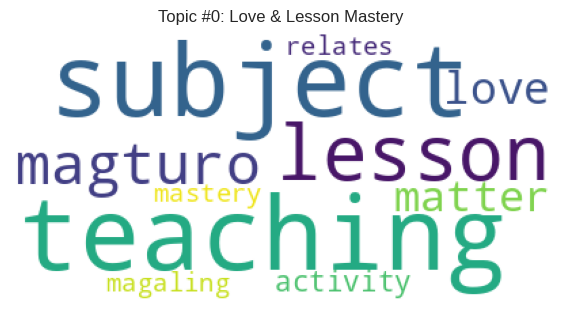

--------------------
Topic #1 Keywords: student, considerate, improve, grade, ingat, example, chill, responsible, laging, mataas
Topic #1 Label: Considerate Student Improvement
  Top Words VADER (Eng) Sentiments:
    - 'student': Neutral (VADER Eng) (0.00)
    - 'considerate': Positive (VADER Eng) (0.44)
    - 'improve': Positive (VADER Eng) (0.44)
    - 'grade': Neutral (VADER Eng) (0.00)
    - 'ingat': Neutral (VADER Eng) (0.00)


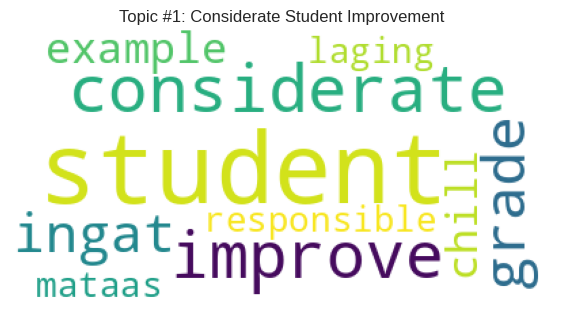

--------------------
Topic #2 Keywords: teacher, experience, explain, share, class, lesson, awesome, magturo, student, nice
Topic #2 Label: Awesome Class Experiences
  Top Words VADER (Eng) Sentiments:
    - 'teacher': Neutral (VADER Eng) (0.00)
    - 'experience': Neutral (VADER Eng) (0.00)
    - 'explain': Neutral (VADER Eng) (0.00)
    - 'share': Positive (VADER Eng) (0.30)
    - 'class': Neutral (VADER Eng) (0.00)


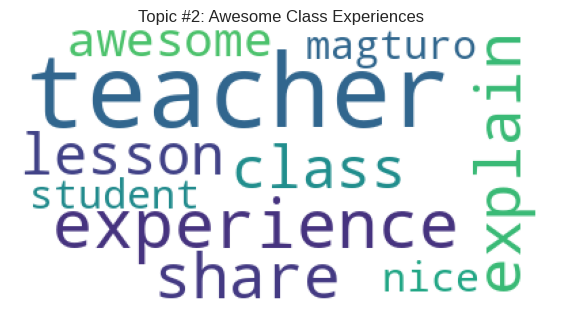

--------------------

Overall Coherence Scores for Final LDA Model
C_v Coherence: 0.5752 (Higher is better)
UMass Coherence: -18.8690 (Closer to 0 better)
C_NPMI Coherence: -0.4757 (Closer to 1 better)

Discussion: C_v is often a good general indicator. UMass values closer to zero are better. C_NPMI closer to 1 is better. Low scores might suggest reviewing preprocessing or topic number.


In [ ]:
print("\nMain Topic Modeling, AI Labeling & Overall Coherence")
topic_labels_by_ai = {}
if not cleaned_df.empty and 'Cleaned_Text_Main' in cleaned_df:
    texts_for_lda = cleaned_df['Cleaned_Text_Main'].tolist()
    tokenized_texts_for_lda_dict = [text.split() for text in texts_for_lda if text]; tokenized_texts_for_lda_dict = [t for t in tokenized_texts_for_lda_dict if t]
    if not tokenized_texts_for_lda_dict: print("No tokens for LDA dictionary."); lda_model = None
    else:
        dictionary = corpora.Dictionary(tokenized_texts_for_lda_dict)
        dictionary.filter_extremes(no_below=2, no_above=0.85)
        corpus = [dictionary.doc2bow(text_tokens) for text_tokens in tokenized_texts_for_lda_dict]; corpus = [c for c in corpus if c]
        if not corpus or not dictionary or len(dictionary.keys()) == 0: print("Corpus or dictionary empty."); lda_model = None
        else:
            final_num_topics = min(actual_num_topics_for_lda, len(dictionary.keys()))
            if final_num_topics < 1: print(f"Too few terms. Skipping LDA."); lda_model = None
            else:
                print(f"Training final LDA model with {final_num_topics} topics...")
                lda_model = LdaModel(corpus, num_topics=final_num_topics, id2word=dictionary, passes=CONFIG["lda_passes"], random_state=CONFIG["lda_random_state"], alpha='auto', eta='auto')
                print("\n--- Top Words for Each Topic & AI Generated Labels ---")
                for topic_id_lda in range(lda_model.num_topics):
                    top_words_probs = lda_model.show_topic(topic_id_lda, topn=CONFIG["top_n_words_for_topic_labeling"])
                    top_words = [word for word, prob in top_words_probs]; print(f"Topic #{topic_id_lda} Keywords: {', '.join(top_words)}")
                    ai_label = "N/A"
                    if gemini_model:
                        gemini_prompt_label = (f"Keywords: '{', '.join(top_words)}'. Suggest concise (3-5 words) label. Output label only.")
                        ai_label_raw = make_gemini_request_with_retry(gemini_prompt_label)
                        if "Error" in ai_label_raw or "Failed" in ai_label_raw or "stopped" in ai_label_raw: print(f"Labeling Error Topic {topic_id_lda}: {ai_label_raw}"); ai_label = "Labeling Error"
                        else: ai_label = ai_label_raw.replace("*","").strip()
                        print(f"Topic #{topic_id_lda} Label: {ai_label}")
                    topic_labels_by_ai[topic_id_lda] = ai_label
                    print("  Top Words VADER (Eng) Sentiments:")
                    for word, prob in top_words_probs[:5]: v_score, v_label = get_vader_sentiment_english(word); print(f"    - '{word}': {v_label} ({v_score:.2f})")
                    plt.figure(figsize=(7,5)); word_cloud_dict = {word: prob for word, prob in top_words_probs}
                    plt.imshow(WordCloud(stopwords=combined_stopwords, background_color="white").fit_words(word_cloud_dict))
                    plt.axis("off"); plt.title(f"Topic #{topic_id_lda}: {ai_label if ai_label != 'Labeling Error' else 'Keywords Shown'}"); plt.show(); print("-" * 20)
                if lda_model:
                    print("\nOverall Coherence Scores for Final LDA Model")
                    coherence_model_cv_final = CoherenceModel(model=lda_model, texts=tokenized_texts_for_lda_dict, dictionary=dictionary, coherence='c_v'); print(f"C_v Coherence: {coherence_model_cv_final.get_coherence():.4f} (Higher is better)")
                    coherence_model_umass_final = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass'); print(f"UMass Coherence: {coherence_model_umass_final.get_coherence():.4f} (Closer to 0 better)")
                    coherence_model_cnpmi_final = CoherenceModel(model=lda_model, texts=tokenized_texts_for_lda_dict, dictionary=dictionary, coherence='c_npmi'); print(f"C_NPMI Coherence: {coherence_model_cnpmi_final.get_coherence():.4f} (Closer to 1 better)")
                    print("\nDiscussion: C_v is often a good general indicator. UMass values closer to zero are better. C_NPMI closer to 1 is better. Low scores might suggest reviewing preprocessing or topic number.")
else: print("cleaned_df empty. Skipping Main Topic Modeling."); lda_model = None

7.4 Overall Sentiment Per Topic

In [ ]:
print("\nOverall Sentiment Per Topic")
topic_sentiment_data = []
df_topic_sentiments = pd.DataFrame() # Initialize
if lda_model and not cleaned_df.empty and 'Cleaned_Text_Main' in cleaned_df:
    required_sentiment_cols = ['VADER_Score_Eng', 'VADER_Sentiment_Eng', 'VADER_Score_Aug', 'VADER_Sentiment_Aug', 'Filipino_Keyword_Score', 'Filipino_Keyword_Sentiment']
    if any(col not in cleaned_df.columns for col in required_sentiment_cols): print(f"Warning: Missing some sentiment columns for per-topic analysis.")
    if 'corpus' not in locals() or not corpus: print("Error: LDA corpus not found.")
    else:
        doc_topics = [lda_model.get_document_topics(doc_bow) for doc_bow in corpus]
        doc_to_dominant_topic = {i: sorted(topics, key=lambda x: x[1], reverse=True)[0][0] for i, topics in enumerate(doc_topics) if topics}
        temp_df = cleaned_df.copy().reset_index(drop=True); temp_df['dominant_topic_lda'] = -1
        for doc_idx, topic_idx in doc_to_dominant_topic.items():
            if doc_idx < len(temp_df): temp_df.loc[doc_idx, 'dominant_topic_lda'] = topic_idx
        for topic_id in range(lda_model.num_topics):
            comments_df = temp_df[temp_df['dominant_topic_lda'] == topic_id]
            num_comments = len(comments_df); ai_label = topic_labels_by_ai.get(topic_id, "N/A")
            top_words = ", ".join([w for w, p in lda_model.show_topic(topic_id, topn=5)])
            data_row = {"Topic ID": topic_id, "AI Label": ai_label, "Top Keywords": top_words, "Num Comments": num_comments}
            if 'VADER_Score_Eng' in comments_df and num_comments > 0:
                data_row["Avg VADER Eng Score"] = f"{comments_df['VADER_Score_Eng'].mean():.2f}"
                data_row["VADER Eng Dist (%)"] = comments_df['VADER_Sentiment_Eng'].value_counts(normalize=True).mul(100).round(1).to_dict()
            if 'VADER_Score_Aug' in comments_df and num_comments > 0:
                data_row["Avg VADER Aug Score"] = f"{comments_df['VADER_Score_Aug'].mean():.2f}"
                data_row["VADER Aug Dist (%)"] = comments_df['VADER_Sentiment_Aug'].value_counts(normalize=True).mul(100).round(1).to_dict()
            if 'Filipino_Keyword_Score' in comments_df and num_comments > 0:
                data_row["Avg Fil. Keyword Score"] = f"{comments_df['Filipino_Keyword_Score'].mean():.2f}"
                data_row["Fil. Keyword Dist (%)"] = comments_df['Filipino_Keyword_Sentiment'].value_counts(normalize=True).mul(100).round(1).to_dict()
            topic_sentiment_data.append(data_row)
        if topic_sentiment_data:
            df_topic_sentiments = pd.DataFrame(topic_sentiment_data)
            print("\nOverall Sentiment Per Topic:"); pd.set_option('display.max_colwidth', 100); display(df_topic_sentiments); pd.reset_option('display.max_colwidth')
            print("\nDiscussion: Table shows avg sentiment scores & distributions per topic. Compare across methods. Negative scores/distributions highlight improvement areas. Consider 'Num Comments'.")
        else: print("Could not calculate sentiment per topic.")
else: print("LDA model or cleaned_df not available. Skipping sentiment per topic.")


Overall Sentiment Per Topic

Overall Sentiment Per Topic:


,Topic ID,AI Label,Top Keywords,Num Comments,Avg VADER Eng Score,VADER Eng Dist (%),Avg VADER Aug Score,VADER Aug Dist (%),Avg Fil. Keyword Score,Fil. Keyword Dist (%)
0,0,Love & Lesson Mastery,"teaching, subject, lesson, magturo, love",50,0.40,"{'Positive (VADER Eng)': 64.0, 'Neutral (VADER Eng)': 30.0, 'Negative (VADER Eng)': 6.0}",0.27,"{'Positive (VADER Aug)': 52.0, 'Neutral (VADER Aug)': 42.0, 'Negative (VADER Aug)': 6.0}",0.32,"{'Neutral (Filipino Keywords)': 72.0, 'Positive (Filipino Keywords)': 26.0, 'Negative (Filipino ..."
1,1,Considerate Student Improvement,"student, considerate, improve, grade, ingat",35,0.36,"{'Positive (VADER Eng)': 65.7, 'Neutral (VADER Eng)': 25.7, 'Negative (VADER Eng)': 8.6}",0.42,"{'Positive (VADER Aug)': 68.6, 'Neutral (VADER Aug)': 28.6, 'Negative (VADER Aug)': 2.9}",0.43,"{'Neutral (Filipino Keywords)': 68.6, 'Positive (Filipino Keywords)': 31.4}"
2,2,Awesome Class Experiences,"teacher, experience, explain, share, class",31,0.35,"{'Positive (VADER Eng)': 67.7, 'Neutral (VADER Eng)': 25.8, 'Negative (VADER Eng)': 6.5}",0.21,"{'Positive (VADER Aug)': 51.6, 'Neutral (VADER Aug)': 41.9, 'Negative (VADER Aug)': 6.5}",0.26,"{'Neutral (Filipino Keywords)': 74.2, 'Positive (Filipino Keywords)': 19.4, 'Negative (Filipino ..."



Discussion: Table shows avg sentiment scores & distributions per topic. Compare across methods. Negative scores/distributions highlight improvement areas. Consider 'Num Comments'.


7.5 Gemini AI Recommendations for Each Labeled Topic

In [ ]:
if gemini_model and lda_model and hasattr(lda_model, 'num_topics') and lda_model.num_topics > 0:
    print("\n\nAI Recommendations for Selected Topics")
    num_topics_for_ai_recs = CONFIG.get("num_ai_recs_per_topic_subset", lda_model.num_topics)
    topic_ids_for_recs = []
    if 'df_topic_sentiments' in locals() and not df_topic_sentiments.empty and 'Avg VADER Aug Score' in df_topic_sentiments.columns: # Check for 'Avg VADER Aug Score'
        # Convert to numeric, coercing errors for proper sorting
        df_topic_sentiments['Avg VADER Aug Score Numeric'] = pd.to_numeric(df_topic_sentiments['Avg VADER Aug Score'], errors='coerce')
        df_topic_sentiments_recs = df_topic_sentiments[df_topic_sentiments['Avg VADER Aug Score Numeric'].notnull()].copy()

        if not df_topic_sentiments_recs.empty:
            sorted_topics_df = df_topic_sentiments_recs.sort_values(by='Avg VADER Aug Score Numeric', ascending=True)
            topic_ids_for_recs = sorted_topics_df.head(num_topics_for_ai_recs)['Topic ID'].astype(int).tolist()
            print(f"Generating AI recommendations for the {len(topic_ids_for_recs)} topic(s) with the most negative average VADER Aug sentiment.")
        else:
            print("No topics with valid numeric sentiment scores for ranking. Defaulting to first N topics.")
            topic_ids_for_recs = list(range(min(num_topics_for_ai_recs, lda_model.num_topics)))
    elif lda_model:
        print(f"Warning: df_topic_sentiments or 'Avg VADER Aug Score' not available. Defaulting to first {num_topics_for_ai_recs} topics.")
        topic_ids_for_recs = list(range(min(num_topics_for_ai_recs, lda_model.num_topics)))

    for topic_id in topic_ids_for_recs:
        top_words_probs = lda_model.show_topic(topic_id, topn=CONFIG["top_n_words_for_topic_gemini_summary"])
        top_words_only = [word for word, prob in top_words_probs]
        ai_generated_label = topic_labels_by_ai.get(topic_id, f"Keywords: {', '.join(top_words_only)}")
        avg_sentiment_info_topic = ""
        if 'df_topic_sentiments' in locals() and not df_topic_sentiments.empty and topic_id in df_topic_sentiments['Topic ID'].values:
             topic_sentiment_row_info = df_topic_sentiments[df_topic_sentiments['Topic ID'] == topic_id].iloc[0]
             avg_sentiment_info_topic = f" (Avg Aug VADER Score: {topic_sentiment_row_info.get('Avg VADER Aug Score', 'N/A')})"
        input_summary_for_topic_rec = f"Topic {topic_id} (Label: {ai_generated_label}{avg_sentiment_info_topic}): Keywords - {', '.join(top_words_only)}"
        gemini_prompt_topic_rec = (f"Topic '{ai_generated_label}'{avg_sentiment_info_topic} (Keywords: '{', '.join(top_words_only)}'). Provide 2-3 actionable teaching recommendations related to this topic.")
        recommendation_text_raw = make_gemini_request_with_retry(gemini_prompt_topic_rec)
        rec_type = f'Topic {topic_id} Rec (Label: {ai_generated_label})'
        if "Error" in recommendation_text_raw or "Failed" in recommendation_text_raw or "stopped" in recommendation_text_raw:
            print(f"\nRec Gen Error Topic {topic_id} ({ai_generated_label}): {recommendation_text_raw}"); recommendation_text = f"Rec Gen Error"
            rec_type += ' - ERROR'
        else:
            recommendation_text = recommendation_text_raw.strip()
            print(f"\nRecommendations for Topic {topic_id} ({ai_generated_label}):\n{recommendation_text}")
        all_gemini_recommendations_data.append({'Type': rec_type, 'Input_Summary_To_Gemini': input_summary_for_topic_rec, 'Gemini_Recommendations': recommendation_text})
        print("-" * 30)
elif not gemini_model: print("\nGemini not configured. Skipping topic recommendations.")
elif not lda_model: print("\nLDA model not available. Skipping topic recommendations.")
else: print("\nNo LDA topics found. Skipping topic recommendations.")



AI Recommendations for Selected Topics
Generating AI recommendations for the 3 topic(s) with the most negative average VADER Aug sentiment.

Recommendations for Topic 2 (Awesome Class Experiences):
Here are 2-3 actionable teaching recommendations related to "Awesome Class Experiences," focusing on the keywords provided and aiming to boost student engagement and positive sentiment:

1.  **Implement Structured Collaborative Sharing & Explanation:** Integrate regular "Share & Explain" sessions into lessons. This could involve:
    *   **Action:** At the end of key segments, divide students into small groups (3-4 students). Each student must explain a specific concept or problem-solving approach from the lesson to their group. Students then have a brief period to share their individual understandings of the content while other members listen and ask clarifying questions.
    *   **Rationale:** This directly addresses the keywords "explain" and "share," encouraging active learning. The co

8. Visualization of Sentiments


Visualizations


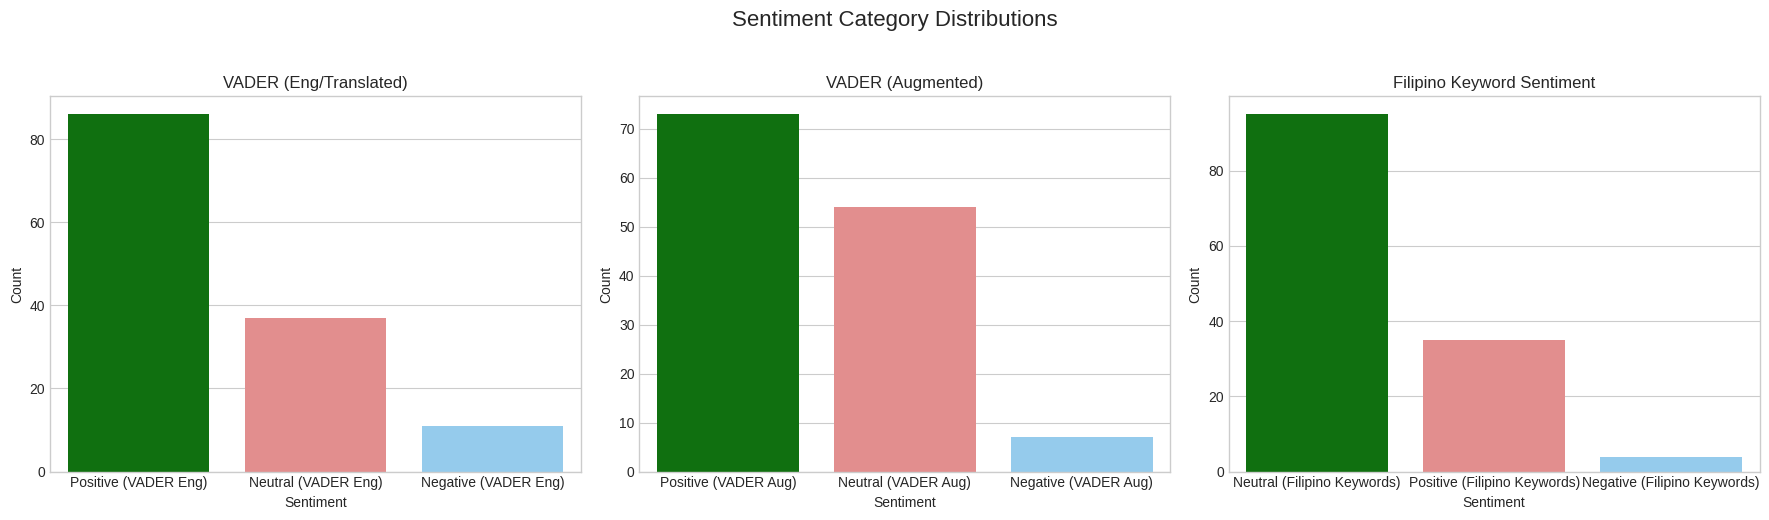

In [ ]:
print("\nVisualizations")
if not cleaned_df.empty:
    num_plots = 0
    if 'VADER_Sentiment_Eng' in cleaned_df.columns: num_plots += 1
    if 'VADER_Sentiment_Aug' in cleaned_df.columns: num_plots += 1
    if 'Filipino_Keyword_Sentiment' in cleaned_df.columns: num_plots +=1
    if num_plots > 0:
        fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 5), squeeze=False); axes = axes.flatten(); plot_idx = 0
        if 'VADER_Sentiment_Eng' in cleaned_df.columns:
            s_counts = cleaned_df['VADER_Sentiment_Eng'].value_counts()
            if not s_counts.empty: sns.barplot(x=s_counts.index,y=s_counts.values,hue=s_counts.index,palette=['g','lightcoral','lightskyblue'],ax=axes[plot_idx],legend=False); axes[plot_idx].set_title('VADER (Eng/Translated)')
            else: axes[plot_idx].set_title('VADER (Eng/Translated) (No Data)')
            axes[plot_idx].set_xlabel('Sentiment'); axes[plot_idx].set_ylabel('Count'); plot_idx +=1
        elif num_plots > plot_idx and plot_idx < len(axes): axes[plot_idx].set_title('VADER (Eng/Translated) (Col N/A)'); plot_idx +=1
        if 'VADER_Sentiment_Aug' in cleaned_df.columns:
            s_counts = cleaned_df['VADER_Sentiment_Aug'].value_counts()
            if not s_counts.empty: sns.barplot(x=s_counts.index,y=s_counts.values,hue=s_counts.index,palette=['g','lightcoral','lightskyblue'],ax=axes[plot_idx],legend=False); axes[plot_idx].set_title('VADER (Augmented)')
            else: axes[plot_idx].set_title('VADER (Augmented) (No Data)')
            axes[plot_idx].set_xlabel('Sentiment'); axes[plot_idx].set_ylabel('Count'); plot_idx +=1
        elif num_plots > plot_idx and plot_idx < len(axes): axes[plot_idx].set_title('VADER (Augmented) (Col N/A)'); plot_idx +=1
        if 'Filipino_Keyword_Sentiment' in cleaned_df.columns and plot_idx < len(axes):
            s_counts = cleaned_df['Filipino_Keyword_Sentiment'].value_counts()
            if not s_counts.empty: sns.barplot(x=s_counts.index,y=s_counts.values,hue=s_counts.index,palette=['g','lightcoral','lightskyblue'],ax=axes[plot_idx],legend=False); axes[plot_idx].set_title('Filipino Keyword Sentiment')
            else: axes[plot_idx].set_title('Filipino Keyword (No Data)')
            axes[plot_idx].set_xlabel('Sentiment'); axes[plot_idx].set_ylabel('Count'); plot_idx +=1
        elif num_plots > plot_idx and plot_idx < len(axes): axes[plot_idx].set_title('Filipino Keyword (Col N/A)'); plot_idx +=1
        plt.suptitle("Sentiment Category Distributions", fontsize=16, y=1.03); plt.tight_layout(); plt.show()
    else: print("No sentiment data columns for bar chart.")
else: print("cleaned_df empty. Skipping Sentiment Bar Charts.")

8.1. Scatter Plots of VADER Polarity Scores


Specific Sentiment Visualizations

Sentiment Scatter Plots


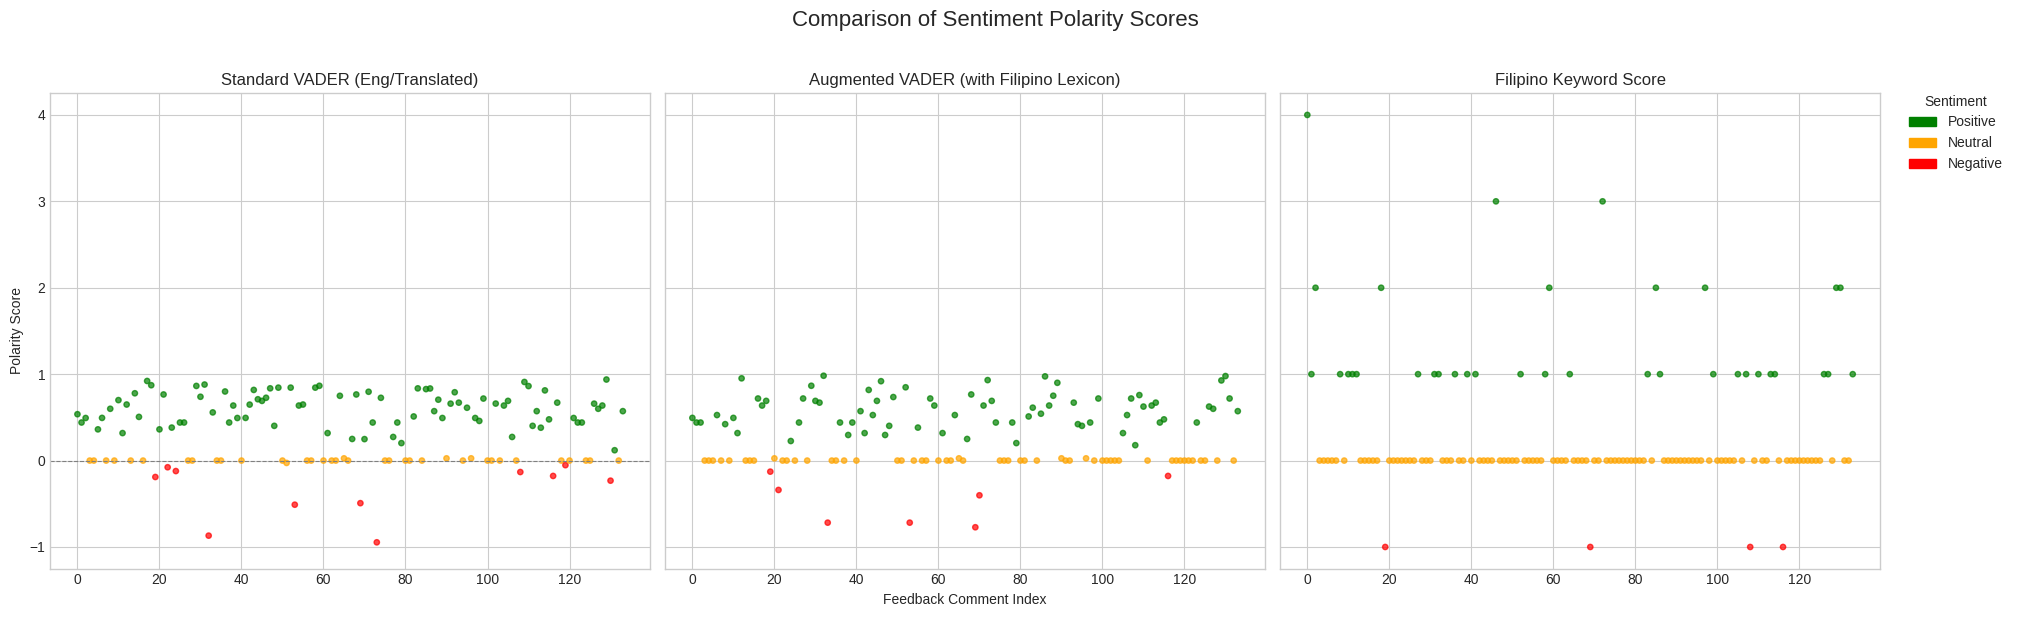

Discussion (Scatter Plots): These plots show each feedback's polarity score across the three methods, colored by sentiment. This comparison helps assess the consistency and impact of different analysis techniques.
--------------------------------------------------

Sentiment Trajectory Plot


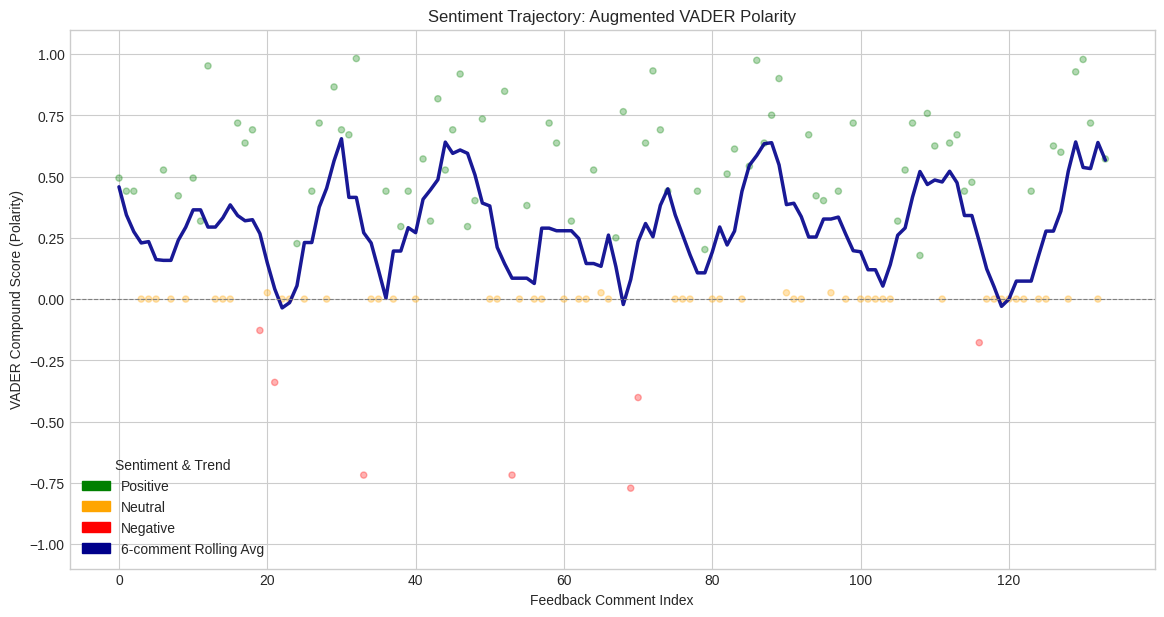

Discussion (Sentiment Trajectory): This plot shows the trend of polarity scores. The colored points represent individual feedback sentiment, while the line shows the smoothed average trend over time (or index).
--------------------------------------------------

Polarity vs. Subjectivity Plot


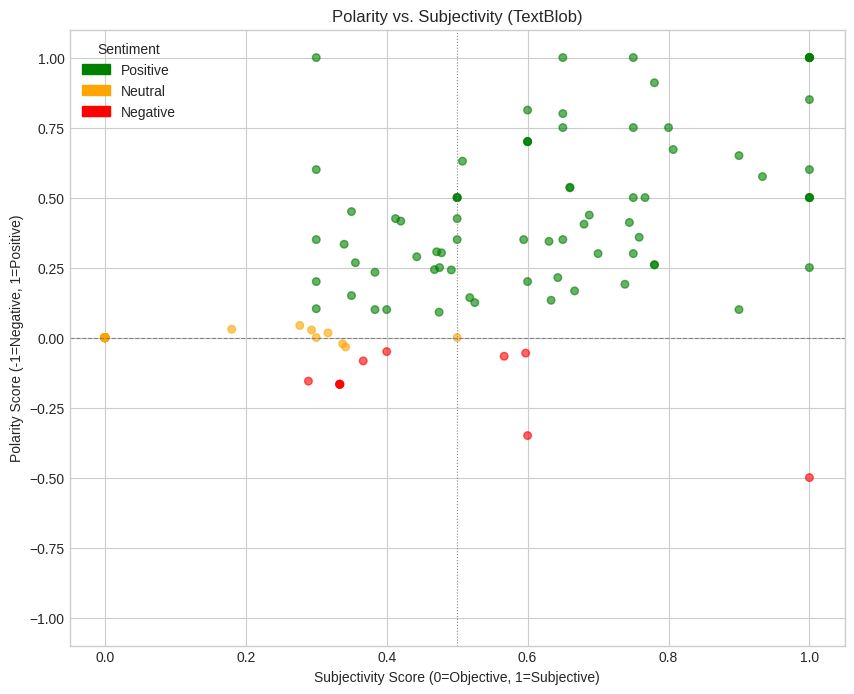

Discussion (Polarity vs. Subjectivity): This plot helps understand the nature of the feedback.
- Green dots are positive opinions, Red dots are negative opinions, and Orange dots are neutral.
- Points to the right are more subjective (opinions), while points to the left are more objective (facts).
--------------------------------------------------


In [ ]:
if not cleaned_df.empty:
    print("\nSpecific Sentiment Visualizations")

    def get_sentiment_color(score, is_keyword_score=False):
      """Returns 'green', 'orange', or 'red' based on the score."""
      if is_keyword_score:
        if score > 0.05:
            return 'green'
        elif score < -0.05:
            return 'red'
        else:
            return 'orange'
      else:
        if score >= 0.05:
            return 'green'
        elif score <= -0.05:
            return 'red'
        else:
            return 'orange'

    feedback_index = range(len(cleaned_df)) # Index for x-axis
    plt.style.use('seaborn-v0_8-whitegrid')

    # 1. Sentiment Box Plot (Augmented VADER Score)
    print("\nSentiment Scatter Plots")
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
    fig.suptitle('Comparison of Sentiment Polarity Scores', fontsize=16, y=1.02)

    # Custom legend handles
    import matplotlib.patches as mpatches
    handles = [mpatches.Patch(color='green', label='Positive'),
               mpatches.Patch(color='orange', label='Neutral'),
               mpatches.Patch(color='red', label='Negative')]

    # Plot 1: Standard VADER (English)
    if 'VADER_Score_Eng' in cleaned_df.columns:
        colors_eng = cleaned_df['VADER_Score_Eng'].apply(get_sentiment_color)
        axes[0].scatter(feedback_index, cleaned_df['VADER_Score_Eng'], c=colors_eng, alpha=0.7, s=15)
        axes[0].set_title('Standard VADER (Eng/Translated)')
        axes[0].set_ylabel('Polarity Score')
        axes[0].axhline(0, color='grey', linestyle='--', linewidth=0.8)
    else:
        axes[0].set_title('Standard VADER (Data N/A)')

    # Plot 2: Augmented VADER
    if 'VADER_Score_Aug' in cleaned_df.columns:
        colors_aug = cleaned_df['VADER_Score_Aug'].apply(get_sentiment_color)
        axes[1].scatter(feedback_index, cleaned_df['VADER_Score_Aug'], c=colors_aug, alpha=0.7, s=15)
        axes[1].set_title('Augmented VADER (with Filipino Lexicon)')
        axes[1].set_xlabel('Feedback Comment Index')
    else:
        axes[1].set_title('Augmented VADER (Data N/A)')

    # Plot 3: Filipino Keyword Score
    if 'Filipino_Keyword_Score' in cleaned_df.columns:
        colors_fil = cleaned_df['Filipino_Keyword_Score'].apply(lambda x: get_sentiment_color(x, is_keyword_score=True))
        axes[2].scatter(feedback_index, cleaned_df['Filipino_Keyword_Score'], c=colors_fil, alpha=0.7, s=15)
        axes[2].set_title('Filipino Keyword Score')
    else:
        axes[2].set_title('Filipino Keyword (Data N/A)')

    fig.legend(handles=handles, title="Sentiment", bbox_to_anchor=(1.01, 0.9))
    plt.tight_layout(rect=[0, 0, 0.95, 1])
    plt.show()
    print("Discussion (Scatter Plots): These plots show each feedback's polarity score across the three methods, colored by sentiment. This comparison helps assess the consistency and impact of different analysis techniques.")
    print("-" * 50)

    # 2. Sentiment Scatter Plot (Augmented VADER Polarity) with custom colors
    print("\nSentiment Trajectory Plot")
    if 'VADER_Score_Aug' in cleaned_df.columns and len(cleaned_df) > 1:
        rolling_window_size = max(5, min(50, len(cleaned_df) // 20 if len(cleaned_df) // 20 > 0 else 5))
        cleaned_df['VADER_Score_Aug_Rolling'] = cleaned_df['VADER_Score_Aug'].rolling(
                                                    window=rolling_window_size,
                                                    center=True,
                                                    min_periods=1).mean()
        sentiment_colors = cleaned_df['VADER_Score_Aug'].apply(get_sentiment_color)

        plt.figure(figsize=(14, 7))
        # Use scatter for raw points to apply individual colors
        plt.scatter(feedback_index, cleaned_df['VADER_Score_Aug'],
                    c=sentiment_colors, alpha=0.3, s=20, label='_nolegend_')
        # Plot the trend line
        plt.plot(feedback_index, cleaned_df['VADER_Score_Aug_Rolling'],
                 alpha=0.9, label=f'{rolling_window_size}-comment Rolling Avg', color='darkblue', linewidth=2.5)

        # Add legend handles for the trajectory plot
        trend_handle = mpatches.Patch(color='darkblue', label=f'{rolling_window_size}-comment Rolling Avg')
        plt.legend(handles=handles + [trend_handle], title="Sentiment & Trend")

        plt.title('Sentiment Trajectory: Augmented VADER Polarity')
        plt.xlabel('Feedback Comment Index')
        plt.ylabel('VADER Compound Score (Polarity)')
        plt.ylim(-1.1, 1.1)
        plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
        plt.show()
        print("Discussion (Sentiment Trajectory): This plot shows the trend of polarity scores. The colored points represent individual feedback sentiment, while the line shows the smoothed average trend over time (or index).")
    else:
        print("VADER_Score_Aug column missing or too few data points for a meaningful trend line.")
    print("-" * 50)

    # 3. Polarity vs. Subjectivity Scatter Plot (using TextBlob scores)
    print("\nPolarity vs. Subjectivity Plot")
    if 'TextBlob_Polarity' in cleaned_df.columns and 'TextBlob_Subjectivity' in cleaned_df.columns:
        textblob_colors = cleaned_df['TextBlob_Polarity'].apply(get_sentiment_color)

        plt.figure(figsize=(10, 8))
        plt.scatter(cleaned_df['TextBlob_Subjectivity'],
                    cleaned_df['TextBlob_Polarity'],
                    c=textblob_colors,
                    alpha=0.6, s=30)

        plt.legend(handles=handles, title="Sentiment")
        plt.title('Polarity vs. Subjectivity (TextBlob)')
        plt.xlabel('Subjectivity Score (0=Objective, 1=Subjective)')
        plt.ylabel('Polarity Score (-1=Negative, 1=Positive)')
        plt.xlim(-0.05, 1.05)
        plt.ylim(-1.1, 1.1)
        plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
        plt.axvline(0.5, color='grey', linestyle=':', linewidth=0.8)
        plt.show()
        print("Discussion (Polarity vs. Subjectivity): This plot helps understand the nature of the feedback.")
        print("- Green dots are positive opinions, Red dots are negative opinions, and Orange dots are neutral.")
        print("- Points to the right are more subjective (opinions), while points to the left are more objective (facts).")
    else:
        print("TextBlob columns not found. Skipping Polarity vs. Subjectivity Plot.")
    print("-" * 50)

else:
    print("cleaned_df is empty. Skipping all visualizations in Section 8.1.")

9. Gemini-Powered Recommendations (CSV Based)

In [ ]:
if gemini_model:
    print("\nGenerating Overall AI Recommendations (based on CSV analysis)")
    if not cleaned_df.empty:
        summary_for_gemini = "Student Feedback Analysis Summary:\n"
        if 'VADER_Sentiment_Eng' in cleaned_df.columns and 'VADER_Score_Eng' in cleaned_df.columns:
            avg_score_vader = cleaned_df['VADER_Score_Eng'].mean(); overall_sent_label_vader = "Neutral"
            if avg_score_vader >= 0.05: overall_sent_label_vader = "Positive"
            elif avg_score_vader <= -0.05: overall_sent_label_vader = "Negative"
            summary_for_gemini += f"\nOverall Std VADER (Eng/Translated) Sentiment (Avg Score): {avg_score_vader:.2f} ({overall_sent_label_vader})\n"
            v_counts = cleaned_df['VADER_Sentiment_Eng'].value_counts()
            if not v_counts.empty:
                summary_for_gemini += f"Dominant Std VADER: {v_counts.idxmax()} ({v_counts.max()} comments)\nDistribution (Counts & %):\n"
                for s, p in (cleaned_df['VADER_Sentiment_Eng'].value_counts(normalize=True) * 100).items(): summary_for_gemini += f"  - {s}: {v_counts.get(s,0)} ({p:.2f}%)\n"
        if 'VADER_Sentiment_Aug' in cleaned_df.columns and 'VADER_Score_Aug' in cleaned_df.columns:
            avg_score_vader_aug = cleaned_df['VADER_Score_Aug'].mean(); overall_sent_label_vader_aug = "Neutral"
            if avg_score_vader_aug >= 0.05: overall_sent_label_vader_aug = "Positive"
            elif avg_score_vader_aug <= -0.05: overall_sent_label_vader_aug = "Negative"
            summary_for_gemini += f"\nOverall Aug VADER (Filipino Lexicon) Sentiment (Avg Score): {avg_score_vader_aug:.2f} ({overall_sent_label_vader_aug})\n"
            v_aug_counts = cleaned_df['VADER_Sentiment_Aug'].value_counts()
            if not v_aug_counts.empty:
                summary_for_gemini += f"Dominant Aug VADER: {v_aug_counts.idxmax()} ({v_aug_counts.max()} comments)\nDistribution (Counts & %):\n"
                for s, p in (cleaned_df['VADER_Sentiment_Aug'].value_counts(normalize=True) * 100).items(): summary_for_gemini += f"  - {s}: {v_aug_counts.get(s,0)} ({p:.2f}%)\n"
        if 'Filipino_Keyword_Sentiment' in cleaned_df.columns:
            summary_for_gemini += f"\nFilipino Keyword Sentiment Distribution (Counts & %):\n"
            f_counts = cleaned_df['Filipino_Keyword_Sentiment'].value_counts()
            if not f_counts.empty:
                summary_for_gemini += f"Dominant Filipino Keyword Sentiment: {f_counts.idxmax()} ({f_counts.max()} comments)\n"
                for s, p in (cleaned_df['Filipino_Keyword_Sentiment'].value_counts(normalize=True) * 100).items(): summary_for_gemini += f"  - {s}: {f_counts.get(s,0)} ({p:.2f}%)\n"
        if lda_model and hasattr(lda_model, 'num_topics') and lda_model.num_topics > 0: # Check lda_model exists
            summary_for_gemini += "\nKey Labeled Topics (Top words from AI labeling):\n"
            # Ensure actual_num_topics_for_lda is defined (e.g., from CONFIG or optimal search)
            # If not, use lda_model.num_topics directly
            num_topics_to_show = CONFIG.get("num_topics_for_overall_gemini_summary", 3)
            num_topics_to_include = min(num_topics_to_show, lda_model.num_topics)

            for i_topic in range(num_topics_to_include):
                topic_words = [w for w,p in lda_model.show_topic(i_topic, topn=CONFIG["top_n_words_for_topic_gemini_summary"])]
                ai_lbl_sum = topic_labels_by_ai.get(i_topic, "Label N/A") # topic_labels_by_ai from 7.3
                summary_for_gemini += f"  - Topic {i_topic} ({ai_lbl_sum}): {', '.join(topic_words)}\n"
        else: summary_for_gemini += "\nTopic modeling not performed/no topics.\n"
        pos_df = cleaned_df[cleaned_df['VADER_Sentiment_Aug'] == 'Positive (VADER Aug)']
        neg_df = cleaned_df[cleaned_df['VADER_Sentiment_Aug'] == 'Negative (VADER Aug)']
        pos_sample = pos_df['Original_Text'].head(1).tolist() if not pos_df.empty else []
        neg_sample = neg_df['Original_Text'].head(1).tolist() if not neg_df.empty else []
        summary_for_gemini += f"\nExample Positive Feedback:\n  - {pos_sample[0] if pos_sample else 'N/A'}\nExample Negative Feedback:\n  - {neg_sample[0] if neg_sample else 'N/A'}\n"

        gemini_prompt_csv = (f"AI for education: Based on summary, give 3-5 actionable teaching recommendations (headings, rationale). Start: 'Overall AI Recommendations:'\n\nSummary:\n{summary_for_gemini}")
        overall_recommendation_text = make_gemini_request_with_retry(gemini_prompt_csv)
        print("\n")
        print(overall_recommendation_text)
        rec_type_csv = 'Overall CSV Based AI Recommendation'
        if "Error" in overall_recommendation_text or "Failed" in overall_recommendation_text or "stopped" in overall_recommendation_text:
            rec_type_csv += ' - ERROR'
        all_gemini_recommendations_data.append({'Type': rec_type_csv, 'Input_Summary_To_Gemini': summary_for_gemini.strip(), 'Gemini_Recommendations': overall_recommendation_text})
    else:
        print("cleaned_df empty. Skipping overall Gemini recs.")
        all_gemini_recommendations_data.append({'Type': 'Overall CSV AI Rec - SKIPPED', 'Input_Summary_To_Gemini': 'cleaned_df empty', 'Gemini_Recommendations': 'Skipped.'})
else:
    print("\nGemini model not configured. Skipping overall AI recs.")
    all_gemini_recommendations_data.append({'Type': 'Overall CSV AI Rec - SKIPPED', 'Input_Summary_To_Gemini': 'Gemini not configured', 'Gemini_Recommendations': 'Skipped.'})


Generating Overall AI Recommendations (based on CSV analysis)


Overall AI Recommendations:

*   **Enhance Pacing & Differentiation Based on Student Needs (Considerate Student Improvement):**
    *   **Rationale:** Negative feedback mentions "fast paced teaching but sometimes its ineffective." The AI identified "considerate" and "improve" as key student desires. This suggests students value a pace that allows for understanding and improvement. Actionable steps include: Implement differentiated instruction to address varying learning speeds, providing additional support for students who need it and offering enrichment activities for those who are ready.
*   **Continue Fostering Positive Classroom Experiences (Awesome Class Experiences):**
    *   **Rationale:** The AI analysis strongly indicates positive sentiment across both English and Filipino feedback. The topic "Awesome Class Experiences" highlights the importance of a positive learning environment. Actionable steps: Continue to c

9.1. Save All Gemini Recommendations to CSV

In [ ]:
if all_gemini_recommendations_data:
    df_all_gemini_recs = pd.DataFrame(all_gemini_recommendations_data)
    all_gemini_recs_filename = CONFIG["output_all_gemini_recs_csv"]
    df_all_gemini_recs.to_csv(all_gemini_recs_filename, index=False)
    print(f"\nAll Gemini recommendations saved to '{all_gemini_recs_filename}'.")
    try: files.download(all_gemini_recs_filename); print(f"Download prompted for '{all_gemini_recs_filename}'.")
    except NameError: print(f"To download, use Colab file explorer for '{all_gemini_recs_filename}'.")
else: print("\nNo Gemini recommendation data to save to CSV.")


All Gemini recommendations saved to 'all_gemini_recommendations.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download prompted for 'all_gemini_recommendations.csv'.


10. Manual Input Recommender System (using Gemini)

In [ ]:
def manual_input_interface():
    if not gemini_model: print("\nGemini not configured. Manual input unavailable."); return
    print("\n--- Manual Feedback Recommender System ---")
    print("Enter student feedback (type 'exit' to quit):")
    while True:
        feedback = input("\nStudent Feedback: ")
        if feedback.lower() == 'exit': print("Exiting manual recommender."); break
        if not feedback.strip(): print("Please enter feedback."); continue

        vader_score_eng, vader_sentiment_eng = get_vader_sentiment_english(feedback) if feedback else ("N/A", "N/A")

        processed_feedback_manual = preprocess_text(feedback, for_lda=False)
        print(f"Processed Feedback: {processed_feedback_manual}")

        vader_score_aug, vader_sentiment_aug = get_vader_sentiment_augmented(processed_feedback_manual) if processed_feedback_manual else ("N/A", "N/A")
        fil_score, fil_sentiment, _, _ = get_filipino_keyword_sentiment(processed_feedback_manual) if processed_feedback_manual else ("N/A", "N/A", "", "")

        print(f"Std VADER (Eng/Translated): {vader_sentiment_eng} (Score: {vader_score_eng if isinstance(vader_score_eng, str) else f'{vader_score_eng:.2f}'})")
        print(f"Augmented VADER: {vader_sentiment_aug} (Score: {vader_score_aug if isinstance(vader_score_aug, str) else f'{vader_score_aug:.2f}'})")
        print(f"Filipino Keyword: {fil_sentiment} (Score: {fil_score})")

        manual_input_summary = (f"Feedback (Original): '{feedback}'\nProcessed: '{processed_feedback_manual}'\n"
                                f"Std VADER: {vader_sentiment_eng} ({vader_score_eng if isinstance(vader_score_eng, str) else f'{vader_score_eng:.2f}'})\n"
                                f"Aug VADER: {vader_sentiment_aug} ({vader_score_aug if isinstance(vader_score_aug, str) else f'{vader_score_aug:.2f}'})\n"
                                f"Filipino Keyword: {fil_sentiment} ({fil_score})")
        gemini_prompt_manual = (f"Feedback & analysis: \n{manual_input_summary}\n\nProvide 2-3 actionable teaching recommendations. Be specific.")

        manual_recommendation_text_raw = make_gemini_request_with_retry(gemini_prompt_manual)
        print("\nAI Recommendations for this Feedback:"); print(manual_recommendation_text_raw)
        rec_type_manual = 'Manual Input AI Recommendation'
        if "Error" in manual_recommendation_text_raw or "Failed" in manual_recommendation_text_raw or "stopped" in manual_recommendation_text_raw:
            rec_type_manual += ' - ERROR/SKIPPED'
        all_gemini_recommendations_data.append({'Type': rec_type_manual, 'Input_Summary_To_Gemini': manual_input_summary, 'Gemini_Recommendations': manual_recommendation_text_raw.strip()})
        print("\n---")

if gemini_model: manual_input_interface()
else: print("\nSkipping manual input interface (Gemini not configured).")

print("\nProcessing Complete")


--- Manual Feedback Recommender System ---
Enter student feedback (type 'exit' to quit):

Student Feedback: Great at explaining but too fast sometimes
Processed Feedback: explaining fast
Std VADER (Eng/Translated): Positive (VADER Eng) (Score: 0.37)
Augmented VADER: Neutral (VADER Aug) (Score: 0.00)
Filipino Keyword: Neutral (Filipino Keywords) (Score: 0)

AI Recommendations for this Feedback:
Okay, here's a breakdown of the feedback, analysis, and actionable teaching recommendations:

**Analysis of the Feedback:**

*   **Original Feedback:** "Great at explaining but too fast sometimes"
*   **Processed:** "explaining fast" (This highlights the core issue)
*   **VADER Scores:**
    *   **Std VADER (English):** Positive (0.37) - While the feedback includes a criticism ("too fast"), the "Great at explaining" part gives it a positive sentiment overall.
    *   **Aug VADER (Augmented):** Neutral (0.00) - This might be due to the augmentation process focusing on the core problem of "explain